<a href="https://colab.research.google.com/github/sejalapeno/NLP-Codes/blob/main/Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# data from:
# https://www.kaggle.com/uciml/sms-spam-collection-dataset
!wget https://lazyprogrammer.me/course_files/spam.csv

--2023-06-17 06:54:37--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K   733KB/s    in 0.7s    

2023-06-17 06:54:39 (733 KB/s) - ‘spam.csv’ saved [503663/503663]



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

In [ ]:
df=pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
# drop unnecessary columns
df = df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis = 1)

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#v1 and v2 doesnt give any idea so rename columns
df.columns=['label','text']

In [ ]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<Axes: >

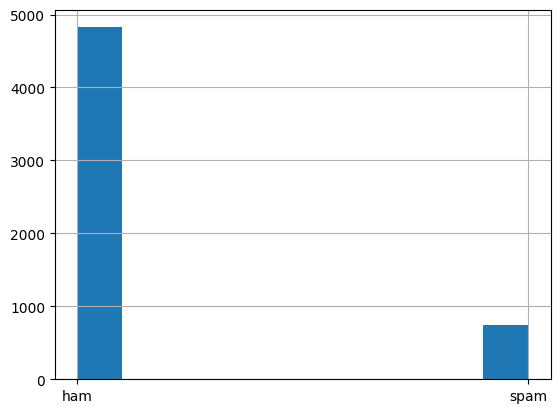

In [ ]:
df['label'].hist()

In [31]:
mapping_dict={'spam':1,'ham':0}  #we are mapping every label(i.e. 2 labels 'spam' and 'ham') to a specific number
df['binary_labels']=df['label'].map(mapping_dict)

In [33]:
df.head()

,label,text,binary_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [40]:
Y = df['binary_labels']
#Y = df['binary_labels'].to_numpy()
df_train, df_test, Ytrain, Ytest = train_test_split(
    df['text'], Y, test_size=0.33)

In [41]:
# try multiple ways of calculating features
#first way
# featurizer = TfidfVectorizer(decode_error='ignore')
# Xtrain = featurizer.fit_transform(df_train)
# Xtest = featurizer.transform(df_test)

#second way
featurizer = CountVectorizer(decode_error='ignore')
Xtrain = featurizer.fit_transform(df_train)
Xtest = featurizer.transform(df_test)

In [42]:
Xtrain

<3733x6971 sparse matrix of type '<class 'numpy.int64'>'
	with 49756 stored elements in Compressed Sparse Row format>

In [44]:
#create model
model=MultinomialNB()
#train model
model.fit(Xtrain,Ytrain)
#print scores
print("train acc:", model.score(Xtrain, Ytrain))
print("test acc:", model.score(Xtest, Ytest))

train acc: 0.994106616662202
test acc: 0.9853181076672104


In [45]:
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)
print("train F1:", f1_score(Ytrain, Ptrain))
print("test F1:", f1_score(Ytest, Ptest))

train F1: 0.9784735812133072
test F1: 0.9409190371991246


In [46]:
Prob_train = model.predict_proba(Xtrain)[:,1]
Prob_test = model.predict_proba(Xtest)[:,1]
print("train AUC:", roc_auc_score(Ytrain, Prob_train))
print("test AUC:", roc_auc_score(Ytest, Prob_test))

train AUC: 0.9931707287542527
test AUC: 0.9797707484623372


In [47]:
cm = confusion_matrix(Ytrain, Ptrain)
cm

array([[3211,    9],
       [  13,  500]])

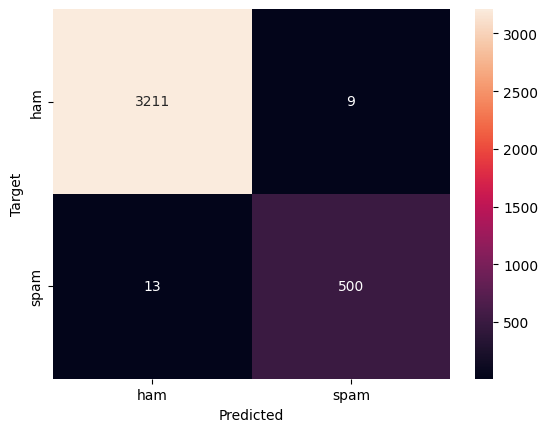

In [48]:
#just a better visualisation of the above cm
def plot_cm(cm):
  classes = ['ham', 'spam']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sn.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)

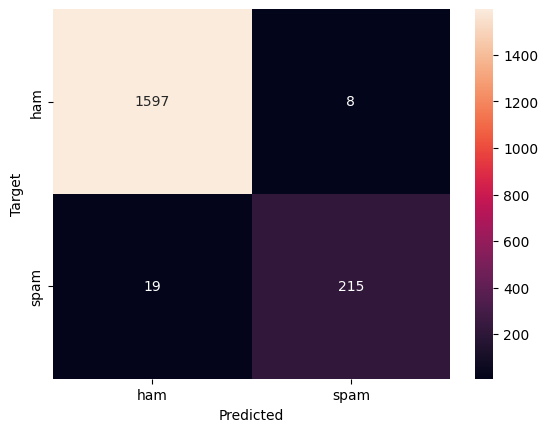

In [49]:
cm_test = confusion_matrix(Ytest, Ptest)
plot_cm(cm_test)

In [52]:
# visualize the data using wordcloud
def visualize(label):
  words = ''
  for msg in df[df['label'] == label]['text']:
    msg = msg.lower()
    words += msg + ' '
  wordcloud = WordCloud(width=600, height=400).generate(words)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

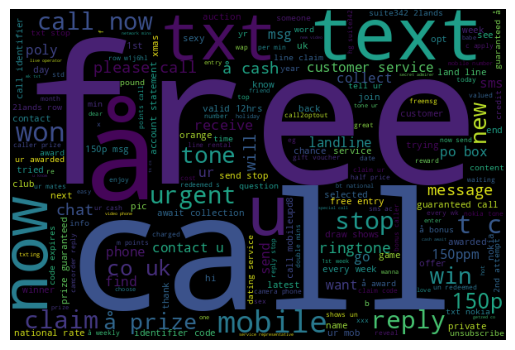

In [53]:
visualize('spam')

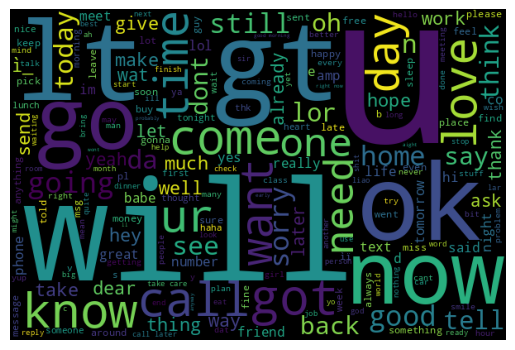

In [54]:
visualize('ham')

In [56]:
# see what we're getting wrong
X = featurizer.transform(df['text'])
df['predictions'] = model.predict(X)

In [58]:
df

,label,text,binary_labels,predictions
0,ham,"Go until jurong point, crazy.. Available only ...",0,0
1,ham,Ok lar... Joking wif u oni...,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,1
3,ham,U dun say so early hor... U c already then say...,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,0
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,1
5568,ham,Will Ì_ b going to esplanade fr home?,0,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0,0
5570,ham,The guy did some bitching but I acted like i'd...,0,0


In [65]:
#messages that should actually be spam
count=0

sneaky_spam = df[(df['predictions'] == 0) & (df['binary_labels'] == 1)]['text']

for msg in sneaky_spam:
  count=count+1
  print(count,msg)

1 FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
2 Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
3 Hi I'm sue. I am 20 years old and work as a lapdancer. I love sex. Text me live - I'm i my bedroom now. text SUE to 89555. By TextOperator G2 1DA 150ppmsg 18+
4 Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
5 Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
6 How about getting in touch with folks waiting for company? Just txt back your NAME and AGE to opt in! Enjoy the community (150p/SMS)
7 Filthy stories and GIRLS waiting for your
8 For sale - arsenal dartboard. Good condition but no doubles or trebles!
9 0A$NETWORKS allow companies to bill for SMS, so they are responsible for their \suppliers\"
10 FreeMsg:Feeli

In [67]:
#messages that should not be spam
count=0

not_spam = df[(df['predictions'] == 1) & (df['binary_labels'] == 0)]['text']

for msg in not_spam:
  count=count+1
  print(count,msg)


1 Yes:)from last week itself i'm taking live call.
2 Are you free now?can i call now?
3 Waiting for your call.
4 We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
5 Hey...Great deal...Farm tour 9am to 5pm $95/pax, $50 deposit by 16 May
6 Total video converter free download type this in google search:)
7 Hi, Mobile no.  &lt;#&gt;  has added you in their contact list on www.fullonsms.com It s a great place to send free sms to people For more visit fullonsms.com
8 Unlimited texts. Limited minutes.
9 Mathews or tait or edwards or anderson
10 Gettin rdy to ship comp
11 Have you laid your airtel line to rest?
12 I liked the new mobile
13 Anytime...
14 I (Career Tel) have added u as a contact on INDYAROCKS.COM to send FREE SMS. To remove from phonebook - sms NO to  &lt;#&gt;
15 Hi, Mobile no.  &lt;#&gt;  has added you in their contact list on www.fullonsms.com It s a great place to send free sms to people For more visit fullonsms.com
16 Nokia ph